# FrozenLake-v1 환경을 통한 Temporal Difference Prediction 실습

Monte Carlo prediction은 한 episode가 끝난 후에 얻은 return 값으로 각 state에서 얻은 reward를 시간에 따라 discount factor를 적용해 value function을 update한다. 그러나 이 방법에 쓰이는 episode는 반드시 terminal state를 통해 '끝이 있는' episode를 사용해야 한다. 무한히 긴 episode가 진행되면 Monte Carlo Prediction을 적용하는 것이 어려울 수 있다.

Dynamic Programming 에서는 time step마다 full-width update를 통해 학습을 진행했지만 environment에 대한 model 정보가 필요했다.

Time-step 마다 학습하면서 model free한 방법인 TD에 대한 기본적인 아이디어를 익히고 실습코드를 작성해보자.

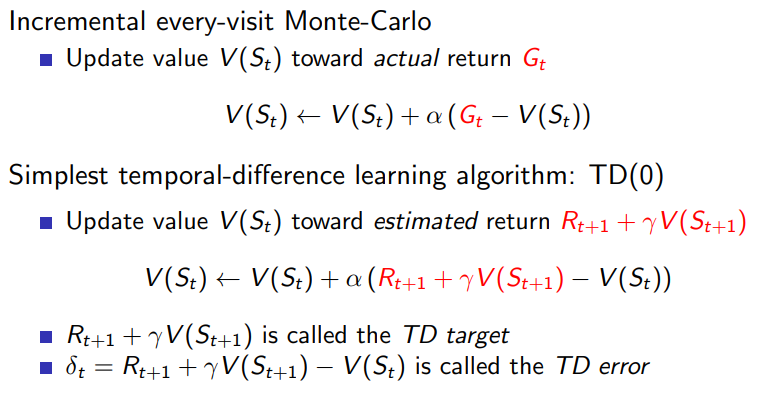

## Library Import

In [1]:
import gym
import numpy as np
import random
from IPython.display import clear_output

## TD prediction for state value function

In [2]:
def TD_prediction(env, alpha = 0.01, gamma = 1):
    V = np.zeros(env.nS)
    
    for i in range(1, 20001):
        state = env.reset()
        reward = 0
        done = False
        
        while not done:
            action = env.action_space.sample()
            next_state, reward, done, info = env.step(action)
            
            if done:
                V[state] = (1 - alpha) * V[state] + alpha * reward
            else:
                V[state] = (1 - alpha) * V[state] + alpha * (reward + gamma * V[next_state])
                
            state = next_state
            
        if i % 100 == 0:
            clear_output(wait=True)
            print('Episode: {}'.format(i))
            
    return V

In [3]:
env = gym.make('FrozenLake-v1', is_slippery=True)
env.render()

V = TD_prediction(env)

print(V)

Episode: 20000
[0.01343514 0.01066217 0.01814551 0.00884017 0.01759887 0.
 0.03516978 0.         0.04076797 0.09610095 0.13763958 0.
 0.         0.1799915  0.42056739 0.        ]


## TD prediction for Q-function

In [4]:
def TD_Q_prediction(env, alpha = 0.01, gamma = 1):
    Q = np.zeros([env.nS, env.nA])
    
    for i in range(1, 300001):
        state = env.reset()
        reward = 0, 0
        done = False
        action = env.action_space.sample()
        
        while not done:
            next_state, reward, done, info = env.step(action)
            next_action = env.action_space.sample()
            
            if done:
                Q[state, action] = (1 - alpha) * Q[state, action] + alpha * reward
            else:
                Q[state, action] = (1 - alpha) * Q[state, action] + alpha * (reward + gamma * Q[next_state, next_action])
                
            state = next_state
            action = next_action
            
        if i % 100 == 0:
            clear_output(wait = True)
            print('Episode: {}'.format(i))
            
    return Q

In [5]:
env = gym.make('FrozenLake-v1', is_slippery=True)
env.render()

Q = TD_Q_prediction(env)

print(Q)

Episode: 300000
[[0.01261525 0.01237412 0.01192476 0.01152046]
 [0.00740595 0.00936599 0.00909759 0.01411084]
 [0.02601685 0.02043514 0.02311632 0.01313841]
 [0.00902564 0.00846011 0.0055174  0.01201877]
 [0.01817901 0.01374856 0.01498873 0.0084463 ]
 [0.         0.         0.         0.        ]
 [0.04890993 0.05411189 0.05343563 0.00615341]
 [0.         0.         0.         0.        ]
 [0.01610586 0.0348982  0.02994242 0.04275514]
 [0.06461505 0.11045384 0.0988673  0.06305543]
 [0.18483379 0.1723755  0.15555314 0.03767718]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.096974   0.19334065 0.23795529 0.17898511]
 [0.24264137 0.53606907 0.50615801 0.48429147]
 [0.         0.         0.         0.        ]]


## TODO
- TD($\lambda$) Prediction